In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path=r"D:\celluo\task 1\Teeth_Dataset\Training"
Validation_path=r"D:\celluo\task 1\Teeth_Dataset\Validation"
test_path=r"D:\celluo\task 1\Teeth_Dataset\Testing"

In [3]:
teeth_classes=os.listdir(train_path)
print(teeth_classes)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [4]:
teeth_classes=os.listdir(test_path)
print(teeth_classes)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


# visualization

In [5]:
list(teeth_classes)

['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

In [6]:
def plot_image(teeth_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(teeth_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

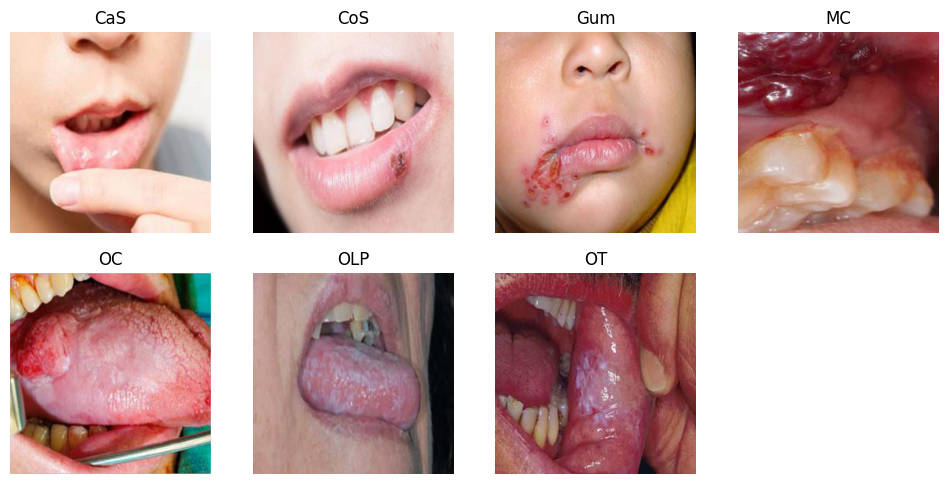

In [7]:
plot_image(teeth_classes)

# preprocessing

In [8]:
data_generator=ImageDataGenerator(rescale=1/255)

In [9]:
train_data=data_generator.flow_from_directory(train_path,
                                              target_size=(128,128),
                                              batch_size=16,class_mode='categorical'

                                             )

Found 3087 images belonging to 7 classes.


In [10]:
Validation_data=data_generator.flow_from_directory(Validation_path,
                                              target_size=(128,128),
                                              batch_size=16,
                                              class_mode='categorical'
                                             )

Found 1028 images belonging to 7 classes.


In [11]:
test_data=data_generator.flow_from_directory(test_path,target_size=(128,128), batch_size=1, class_mode='categorical')

Found 1028 images belonging to 7 classes.


In [12]:
def plot_image(teeth_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(teeth_classes):
        image_path = train_data + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

In [13]:
plot_image(teeth_classes)

TypeError: unsupported operand type(s) for +: 'DirectoryIterator' and 'str'

<Figure size 1200x1200 with 0 Axes>

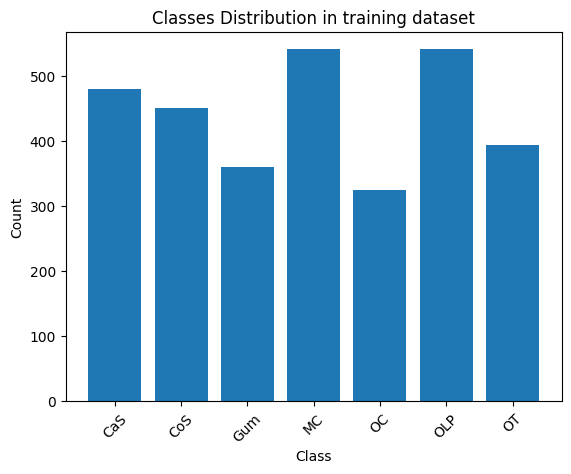

In [14]:
# Count the occurrences of each class
class_counts = []
for subfolder in os.listdir(train_path):
    subfolder_path = os.path.join(train_path, subfolder)
    if os.path.isdir(subfolder_path):
      count = len(os.listdir(subfolder_path))
      class_counts.append(count)

# Get class names
class_names = list(train_data.class_indices.keys())

# Create a bar chart
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Classes Distribution in training dataset')
plt.xticks(rotation=45)
plt.show()

# build_model

In [15]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dense(7,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 2, 2, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 1, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,679 (362.03 KB)

 Trainable params: 92,551 (361.53 KB)

 Non-trainable params: 128 (512.00 B)

In [17]:
from sklearn.utils import class_weight
class_weights = {}
for i in range(7):
    wieghted_class = max(class_counts)/class_counts[i]
    class_weights[i] = wieghted_class

In [18]:
class_weights

{0: 1.125,
 1: 1.2,
 2: 1.5,
 3: 1.0,
 4: 1.6666666666666667,
 5: 1.0,
 6: 1.3740458015267176}

In [19]:
from tensorflow import keras
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath="/kaggle/working/checkpoint.keras",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

# compile

In [20]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


# fit model

In [21]:
model_history =model.fit(train_data,
                         epochs=25,validation_data=Validation_data,
                         class_weight=class_weights,
                         callbacks=[model_checkpoint_callback]
                        )

Epoch 1/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 134s 614ms/step - accuracy: 0.1602 - loss: 2.3581 - val_accuracy: 0.2422 - val_loss: 1.8918
Epoch 2/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 58s 301ms/step - accuracy: 0.2470 - loss: 2.1495 - val_accuracy: 0.3298 - val_loss: 1.7705
Epoch 3/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 58s 299ms/step - accuracy: 0.3541 - loss: 1.9608 - val_accuracy: 0.3774 - val_loss: 1.6021
Epoch 4/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 58s 298ms/step - accuracy: 0.3809 - loss: 1.8640 - val_accuracy: 0.3687 - val_loss: 1.6291
Epoch 5/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 319ms/step - accuracy: 0.4002 - loss: 1.7615 - val_accuracy: 0.4134 - val_loss: 1.5184
Epoch 6/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 62s 318ms/step - accuracy: 0.4832 - loss: 1.6122 - val_accuracy: 0.4660 - val_loss: 1.4217
Epoch 7/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 59s 305ms/step - accuracy: 0.5257 - loss: 1.5177 - val_accuracy: 0.4212 - val_loss: 1.5340
Epoch 8/25
193/193 ━━━━━━━━━━━━━━━━━━━━ 59s 305ms/step - accuracy: 0.5298 - loss: 

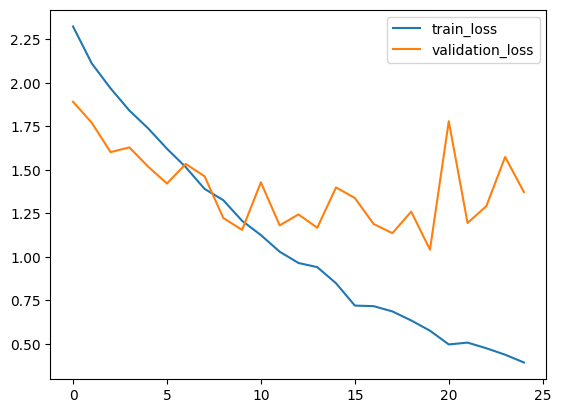

In [22]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

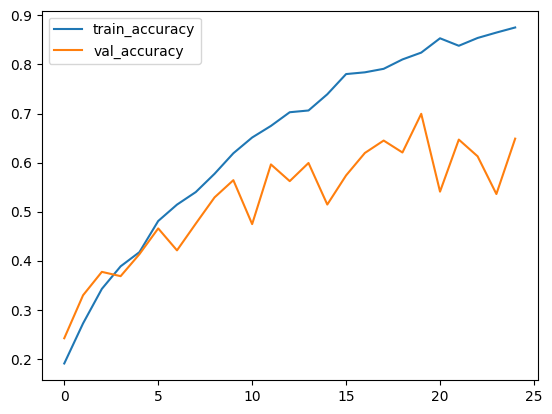

In [23]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [25]:
model.evaluate(test_data)

1028/1028 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6741 - loss: 1.1780


[1.1616286039352417, 0.674124538898468]

In [26]:
model.save('teeth.h5')

In [28]:
%%writefile teeth.py
import streamlit as st
import numpy as np 
import cv2
from tensorflow.keras.models import load_model
from PIL import Image
model=load_model(r"C:\Users\arwat\teeth.h5")
st.title("Teeth APP Classification ")
st.write("welcome to my Teeth APP classification")
uploaded_image = st.file_uploader("Upload an Image", type = ['jpg', 'png', 'jpeg'])
if uploaded_image is not None:
    img = Image.open(uploaded_image)  # Open the image
    st.image(img, caption='Uploaded Image..')  # Show image on Streamlit
    
    # 1- Convert image to array
    new_image = np.array(img)
    
    # 2- Resize image to be 128 * 128
    new_image = cv2.resize(new_image, (128, 128))
    
    # 3- Convert image to grayscale (if needed) and then to 3-channel RGB
    if new_image.ndim == 3:
        new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    
    # Convert grayscale to RGB by stacking the grayscale image into 3 channels
    new_image = np.stack((new_image,) * 3, axis=-1)
    
    # 4- Normalize image
    new_image = new_image.astype('float32') / 255.0
    
    # 5- Reshape image to match the model input shape
    new_image = new_image.reshape(1, 128, 128, 3)  # Ensure it has 3 channels
    
 # Make prediction
    prediction = model.predict(new_image)
    predicted_class = np.argmax(prediction) # Get the index of the predicted class  , axis=1)[0] 
    #predicted_class_label = class_labels[predicted_class_index]  # Map index to class label
    
    st.write(f'Predicted Class: {predicted_class}')


Overwriting teeth.py
